In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
wine_df = pd.read_csv('wine.xls', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])

In [3]:
wine_df.columns

Index(['Cultivator', 'Alchol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash',
       'Magnesium', 'Total_phenols', 'Falvanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [4]:
wine_df.shape

(178, 14)

In [5]:
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alchol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Falvanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [6]:
wine_df.head(10)  #let us look at the raw data. As is evident, there are lot of missing values 

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [7]:
wine_df.shape

(178, 14)

In [8]:
14*14

196

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


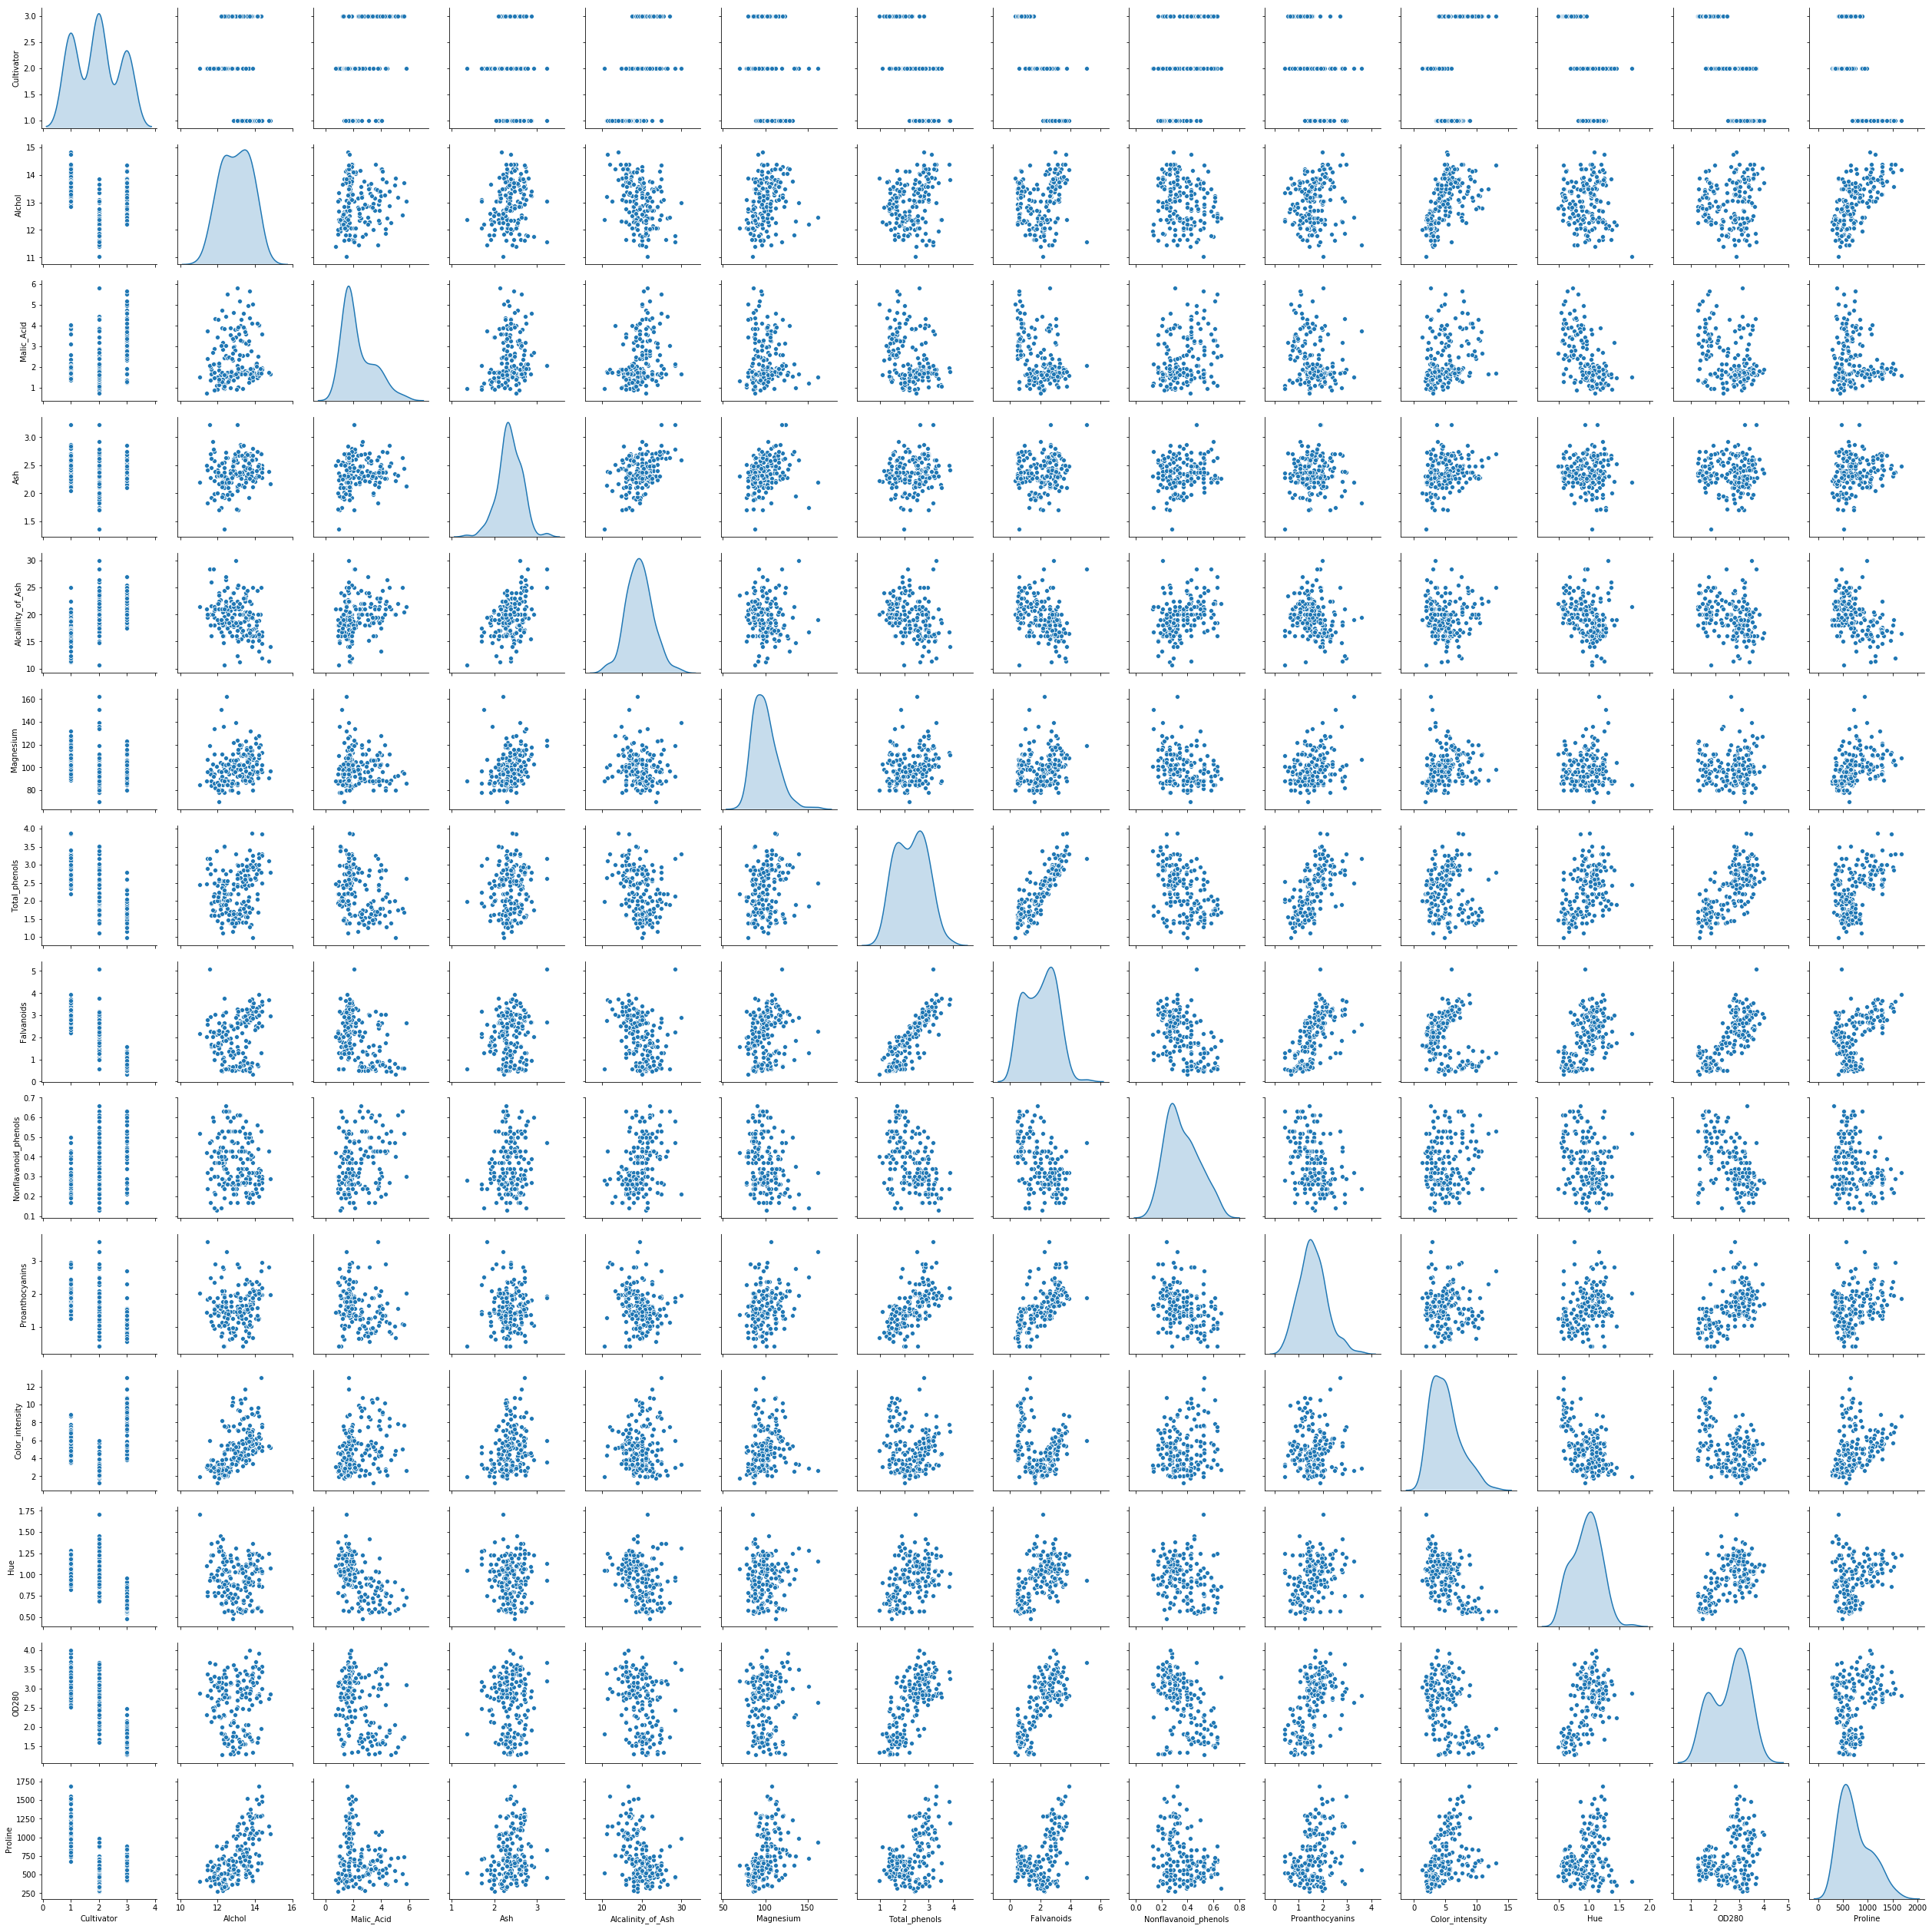

In [9]:
import seaborn as sns
sns.pairplot(wine_df,diag_kind='kde')

In [10]:
wine_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Cultivator              178 non-null int64
Alchol                  178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity_of_Ash       178 non-null float64
Magnesium               178 non-null int64
Total_phenols           178 non-null float64
Falvanoids              178 non-null float64
Nonflavanoid_phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [11]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X =  wine_df.drop("Cultivator", axis=1)
y =  wine_df.pop("Cultivator")

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=2)





In [12]:
X.head()

,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

#dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)
                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy' ,random_state=0,max_depth=4)

In [14]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [15]:
y_pred=dt_model.predict(test_set)   # performance on test data
acc=metrics.accuracy_score(test_labels,y_pred)
print(acc)

0.8703703703703703


In [16]:
cm=metrics.confusion_matrix(test_labels,y_pred)
print(cm)

[[19  1  0]
 [ 2 18  0]
 [ 0  4 10]]


In [17]:
cr=metrics.classification_report(test_labels,y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.90      0.95      0.93        20
           2       0.78      0.90      0.84        20
           3       1.00      0.71      0.83        14

   micro avg       0.87      0.87      0.87        54
   macro avg       0.90      0.85      0.87        54
weighted avg       0.88      0.87      0.87        54



In [18]:
#Perform Grid Search Method to find the optimal max_depth size
from sklearn.model_selection import GridSearchCV
parameter={'max_depth':np.arange(1,10)}
GS=GridSearchCV(dt_model,parameter,cv=3)
GS.fit(X,y)


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
GS.best_params_

{'max_depth': 4}

In [20]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

train_char_label = ['1', '2', '3']
wine_Tree_File = open('wine_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=wine_Tree_File, feature_names = list(train_set), class_names = list(train_char_label))

wine_Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))


                           Imp
Alchol                0.000000
Malic_Acid            0.024662
Ash                   0.000000
Alcalinity_of_Ash     0.000000
Magnesium             0.000000
Total_phenols         0.000000
Falvanoids            0.433706
Nonflavanoid_phenols  0.000000
Proanthocyanins       0.000000
Color_intensity       0.237675
Hue                   0.010313
OD280                 0.000000
Proline               0.293643


In [21]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view 
#or create a .png as below

system("dot -Tpng wine_tree.dot -o wine_tree.png")   # This command is to the OS
Image("wine_tree.png")        # use the image command to read the .png file and print on screen

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

#                                      Regularising the Decision Tree

In [22]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
wine_tree_regularized = open('wine_tree_regularized.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file= wine_tree_regularized , feature_names = list(train_set), class_names = list(train_char_label))

wine_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))


                           Imp
Alchol                0.000000
Malic_Acid            0.024919
Ash                   0.000000
Alcalinity_of_Ash     0.000000
Magnesium             0.000000
Total_phenols         0.000000
Falvanoids            0.438226
Nonflavanoid_phenols  0.000000
Proanthocyanins       0.000000
Color_intensity       0.240152
Hue                   0.000000
OD280                 0.000000
Proline               0.296704


In [24]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view
# or create a .png as below
system("dot -Tpng wine_tree_regularized.dot -o wine_tree_regularized.png")
Image("wine_tree_regularized.png")

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

In [25]:
test_pred = dt_model.predict(test_set)

In [26]:
dt_model.score(test_set , test_labels)

0.8518518518518519

In [27]:
from sklearn import metrics
cr=metrics.classification_report(test_pred , test_labels)
print(cr)

              precision    recall  f1-score   support

           1       0.95      0.86      0.90        22
           2       0.85      0.77      0.81        22
           3       0.71      1.00      0.83        10

   micro avg       0.85      0.85      0.85        54
   macro avg       0.84      0.88      0.85        54
weighted avg       0.87      0.85      0.85        54



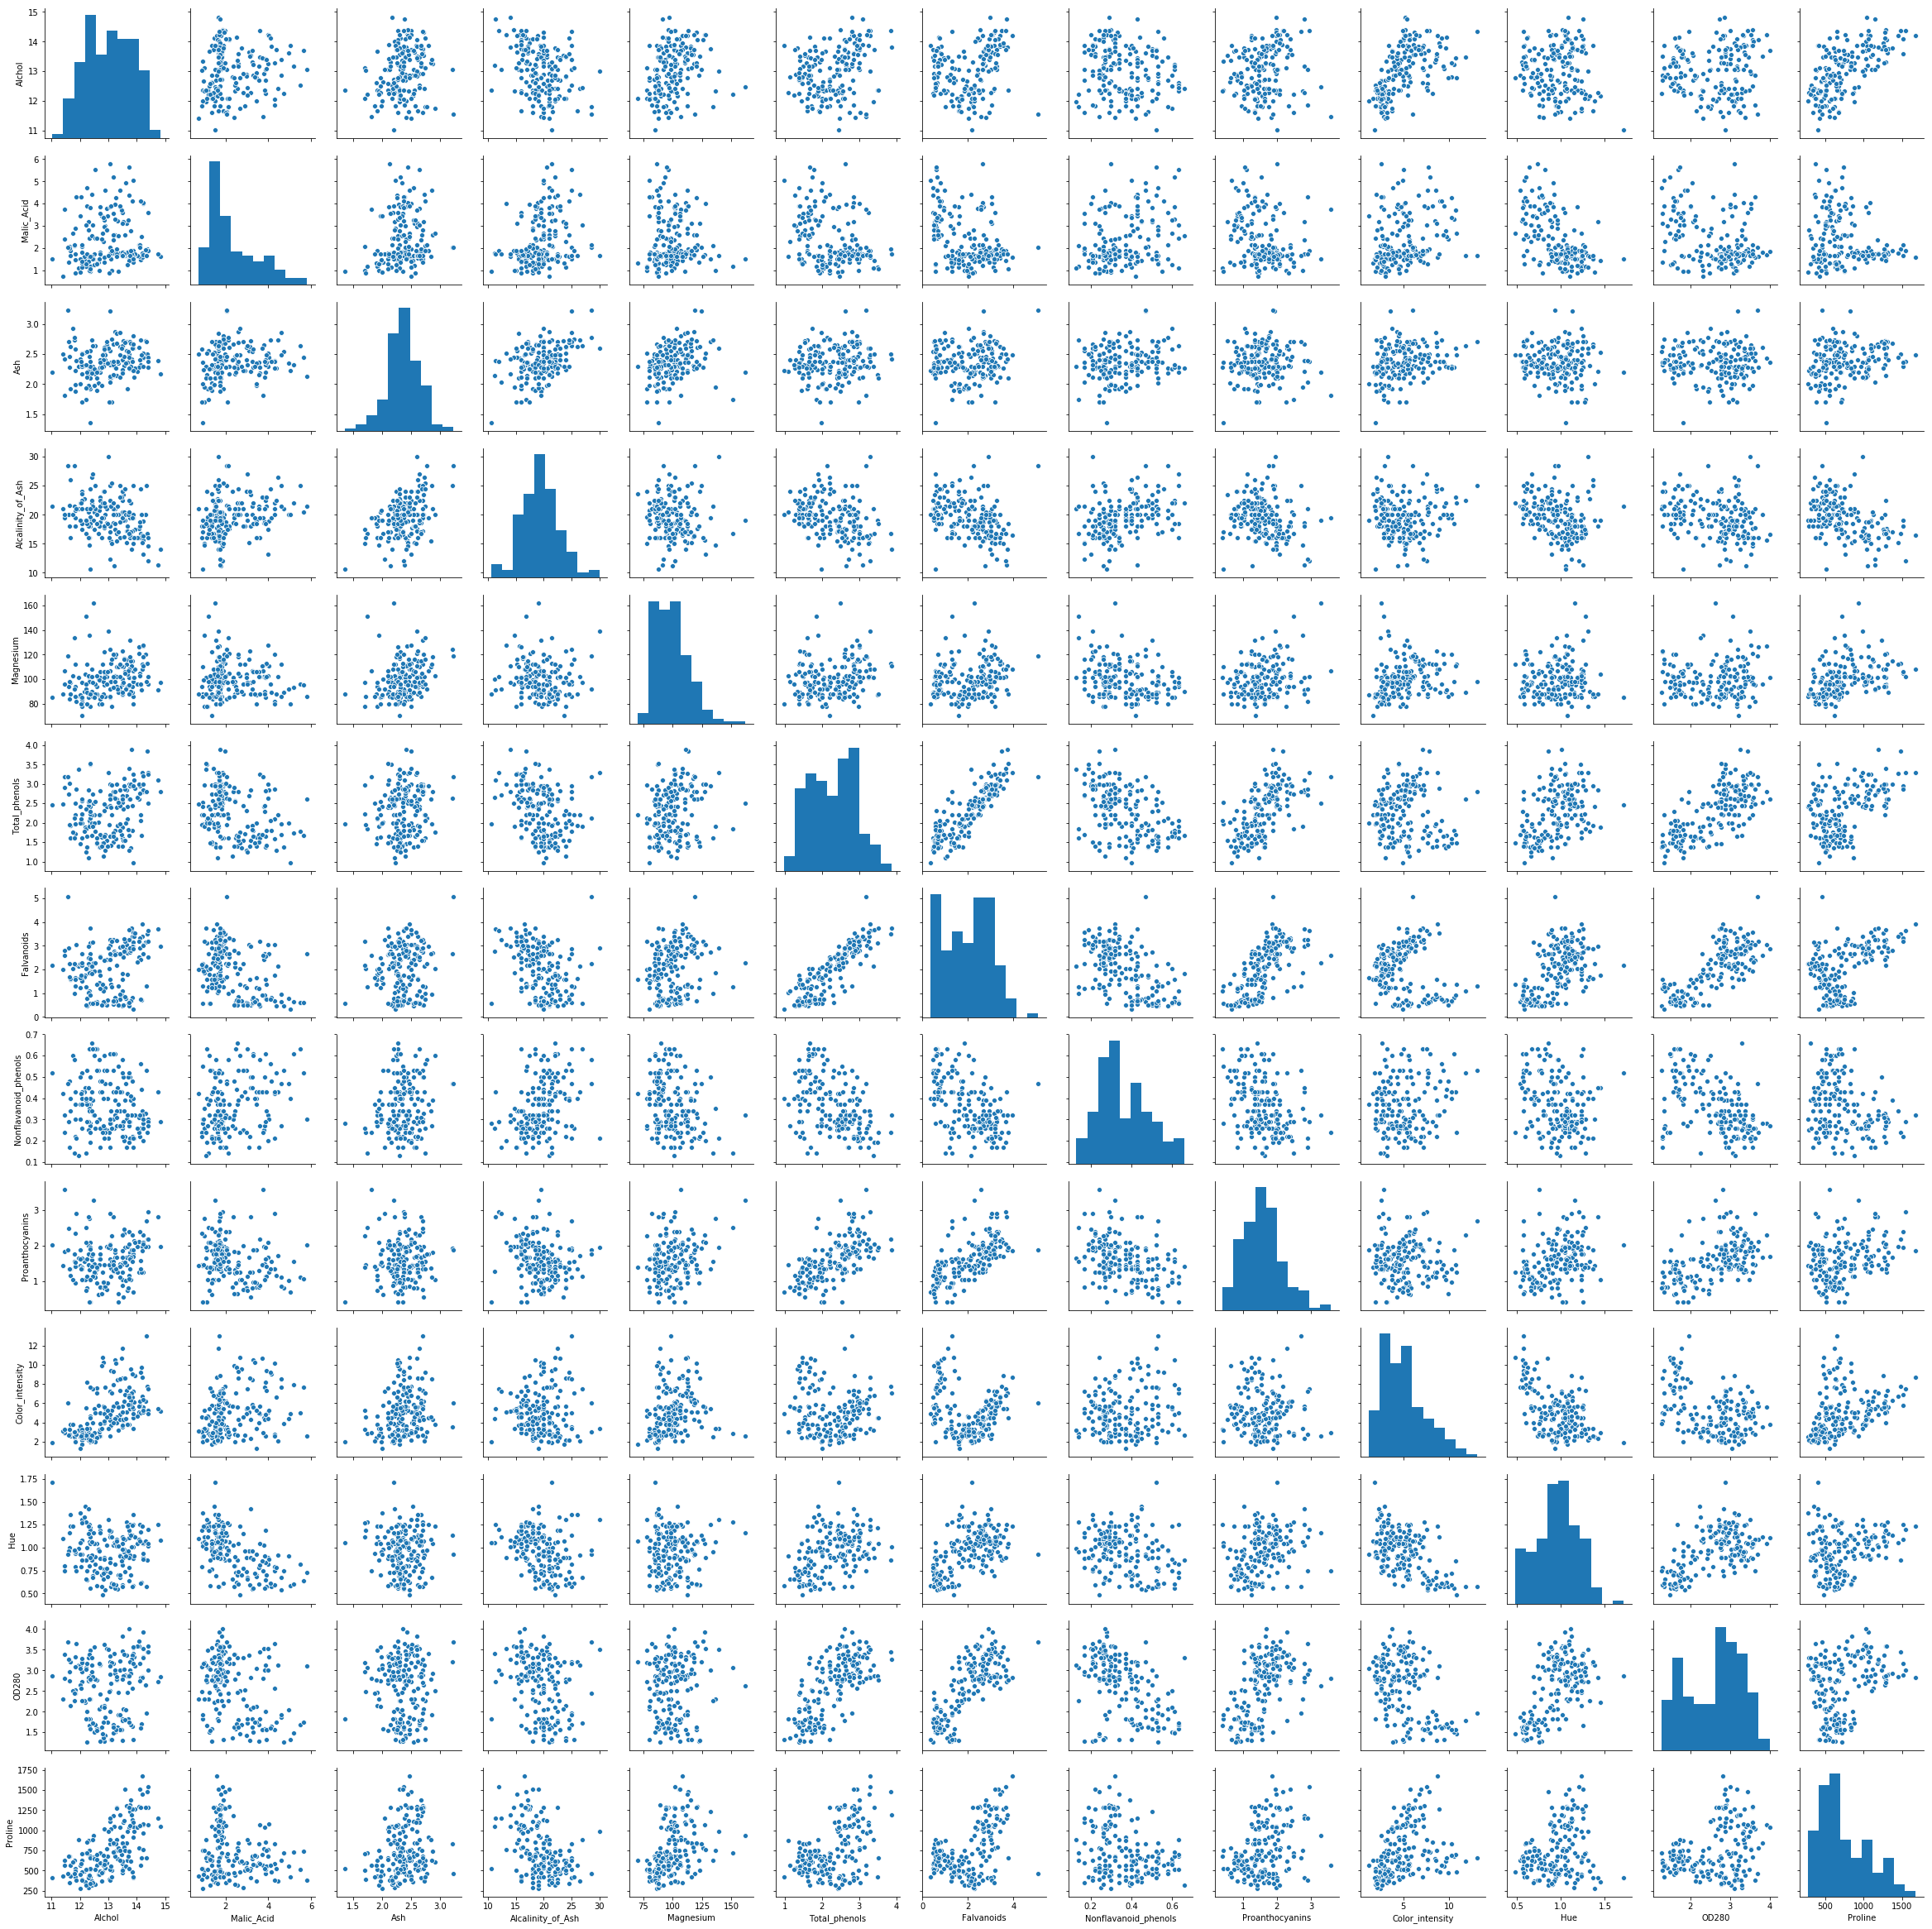

In [28]:
import seaborn as sns
sns.pairplot(wine_df)